<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#US-Data" data-toc-modified-id="US-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>US Data</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Fit-and-Predict" data-toc-modified-id="Fit-and-Predict-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit and Predict</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li></ul></div>

## US Data

## Load data

In [9]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Get our Country model data
country = 'US'
filepath = '../data/raw/'

us = CovidCountry(country=country,
                  filepath=filepath)
us.load(732000)

## Fit and Predict

In [10]:
us.fit(curve='gamma')
us_df = us.predict()
us.save(filepath='../data/processed/')

In [11]:
# Show small window of prediction and actual
us_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-04-16,31451.0,26793.745033
2020-04-17,31905.0,25445.032471
2020-04-18,32294.0,24037.695438
2020-04-19,NaN,22593.529874
2020-04-20,NaN,21132.670460


## Display Actual vs Prediction

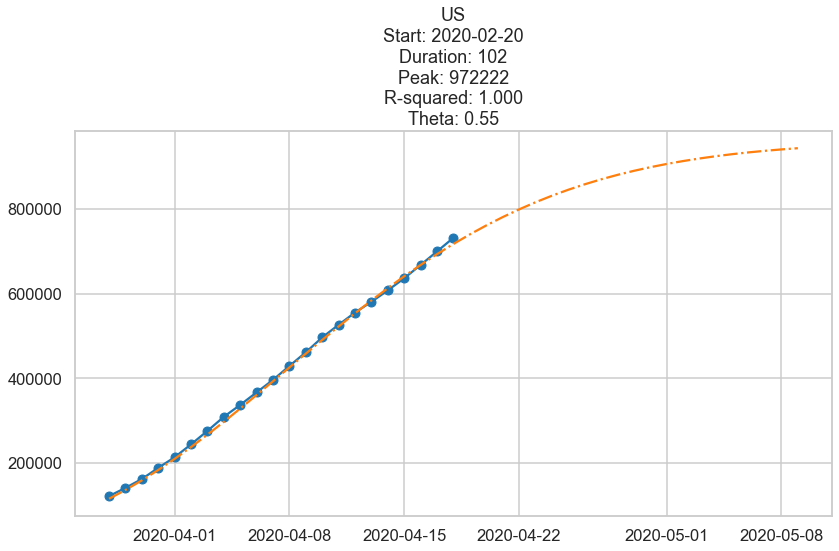

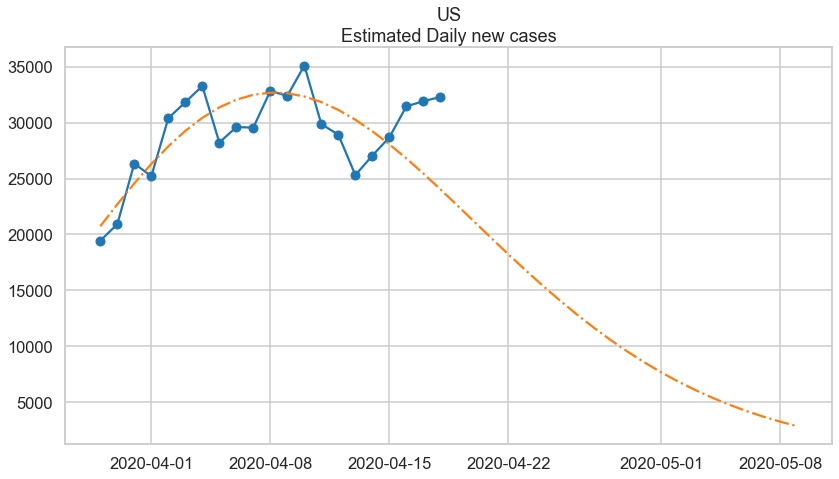

In [12]:
us.display(offset=21)